# Assignment8

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [23]:
df = pd.read_csv("G:\Others\Data Science - TYPE A\Guvi\Assignment\Task 6\\car_data.csv")

In [24]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [25]:
model = linear_model.LinearRegression()

In [26]:
x = np.array(df['Mileage']).reshape(-1,1)
y = np.array(df['Price']).reshape(-1,1)
model.fit(x,y)
y_pred = model.predict(x)
model.score(x,y) # This is similar to accuracy(in backend)

0.02046344732348926

In [6]:
# As the r2 score is very low the equaion is not a good fit

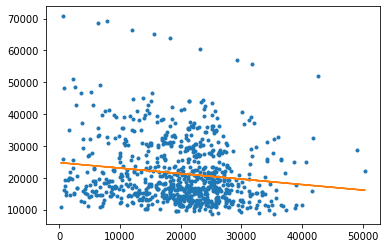

In [27]:
plt.plot(x,y,'.')
plt.plot(x,y_pred)
plt.show()

#### Part 2

In [28]:
cols = list(df.columns)
x = df[[cols[1]]+cols[6:12]]
y = df['Price']

model.fit(x,y)
model.score(x,y)

0.4462643536728379

In [9]:
# equation is not a good fit

In [29]:
x.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,8221,6,3.1,4,1,1,1
1,9135,6,3.1,4,1,1,0
2,13196,6,3.1,4,1,1,0
3,16342,6,3.1,4,1,0,0
4,19832,6,3.1,4,1,0,1


In [30]:
x.columns

Index(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], dtype='object')

In [31]:
model.coef_

array([-1.69747832e-01,  3.79237893e+03, -7.87220732e+02, -1.54274585e+03,
        6.28899715e+03, -1.99379528e+03,  3.34936162e+03])

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
norm_x = scaler.fit_transform(x)
new_x = pd.DataFrame(norm_x, columns=['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'])

In [33]:
new_x.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,0.158716,0.5,0.340909,1.0,1.0,1.0,1.0
1,0.176952,0.5,0.340909,1.0,1.0,1.0,0.0
2,0.257976,0.5,0.340909,1.0,1.0,1.0,0.0
3,0.320744,0.5,0.340909,1.0,1.0,0.0,0.0
4,0.390375,0.5,0.340909,1.0,1.0,0.0,1.0


In [34]:
model.fit(new_x,y)
model.score(new_x,y)

0.4462643536728379

In [35]:
abs(model.coef_).argmax()

1

In [17]:
#The most important feature therefore is cylinder

In [36]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [37]:
y = pd.DataFrame(y, columns=['Price'])

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = new_x
y = y.astype('int')
chi2_features = SelectKBest(chi2, k = 6)
X_kbest_features = chi2_features.fit_transform(x, y)
chi_support = chi2_features.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()

In [50]:
print('Original feature number:', x.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])
print('The important features are:', chi_feature)

Original feature number: 7
Reduced feature number: 6
The important features are: ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


In [41]:
cols

['Price',
 'Mileage',
 'Make',
 'Model',
 'Trim',
 'Type',
 'Cylinder',
 'Liter',
 'Doors',
 'Cruise',
 'Sound',
 'Leather']

In [55]:
x = df[cols[6:]]
y = df['Price']

model.fit(x,y)
model.score(x,y)

0.4265348637809262

#### Part 3

In [61]:
x = df.drop(columns=['Price','Trim'])

In [70]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
x['Make'] = label.fit_transform(x['Make'])
x['Model'] = label.fit_transform(x['Model'])
x['Type'] = label.fit_transform(x['Type'])

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = x
y = y.astype('int')
chi2_features = SelectKBest(chi2, k = 8)
X_kbest_features = chi2_features.fit_transform(x, y)
chi_support = chi2_features.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()

In [81]:
print('Original feature number:', x.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])
print('The important features are:', chi_feature)

Original feature number: 10
Reduced feature number: 8
The important features are: ['Mileage', 'Make', 'Model', 'Type', 'Cylinder', 'Liter', 'Sound', 'Leather']


In [82]:
model.fit(x,y)
model.score(x,y)

0.4770535484182985